In [6]:
import sys
sys.path.append('./models/results')
import matplotlib.pyplot as plt
import numpy as np
import dida_caps_not_clean, dida_spinal_not_clean, historical_spinal_not_clean, historical_caps_not_clean

labels = ['baseline', 'standard', 'binarize']
folder_path = './imgs/char_results_plots/'
plt.rcParams.update({'font.size': 28})

def plot_character_accuracy(accuracy_dicts, labels, title= "", file_name="test"):

    save_path = folder_path + file_name

    if len(accuracy_dicts) != len(labels):
        raise ValueError("The number of dictionaries and labels must be the same.")
    
    sorted_data = []
    for accuracy_dict in accuracy_dicts:
        sorted_data.append(dict(sorted(accuracy_dict.items())))

    characters = list(sorted_data[0].keys()) 
    accuracies = [list(data.values()) for data in sorted_data]
    y_limit = max(max(acc) for acc in accuracies) * 1.1

    bar_width = 0.2
    x_positions = np.arange(len(characters))

    plt.figure(figsize=(14, 7))
    for i, acc in enumerate(accuracies):
        plt.bar(x_positions + i * bar_width, acc, bar_width, label=labels[i])
    
    plt.title(title)
    plt.xlabel("")
    plt.ylabel("Accuracy")
    plt.ylim(0, y_limit)
    plt.xticks(x_positions + (len(accuracy_dicts) - 1) * bar_width / 2, characters, rotation=0)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

In [7]:
plot_character_accuracy(
    accuracy_dicts= [dida_caps_not_clean.raw, 
     dida_caps_not_clean.roi, 
     dida_caps_not_clean.binary], 
    labels= labels, 
    title= "CapsNet Model on DIDA", 
    file_name= "dida_caps_not_clean")

In [8]:
plot_character_accuracy(
    accuracy_dicts= [dida_spinal_not_clean.raw, 
     dida_spinal_not_clean.roi, 
     dida_spinal_not_clean.binary], 
    labels= labels, 
    title="SpinalNet Model on DIDA", 
    file_name="dida_spinal_not_clean")

In [9]:
plot_character_accuracy(
    accuracy_dicts= [historical_spinal_not_clean.raw, 
     historical_spinal_not_clean.roi, 
     historical_spinal_not_clean.binary], 
    labels= labels, 
    title="SpinalNet Model on Historical Dataset", 
    file_name="historical_spinal_not_clean")

In [10]:
plot_character_accuracy(
    accuracy_dicts= [historical_caps_not_clean.raw, 
     historical_caps_not_clean.roi, 
     historical_caps_not_clean.binary], 
    labels= labels, 
    title="CapsNet Model on Historical Dataset", 
    file_name="historical_caps_not_clean")

In [55]:
import os
import random
import shutil

def qualitative_images(dataset_folder, output_folder, num_samples=25):
    """
    Select a specified number of random images from the dataset across all classes.
    """
    class_to_images = {}
    for class_name in os.listdir(dataset_folder):
        class_folder = os.path.abspath(os.path.join(dataset_folder, class_name))
        if os.path.isdir(class_folder):
            file_paths = [
                os.path.abspath(os.path.join(class_folder, file))
                for file in os.listdir(class_folder)
                if os.path.isfile(os.path.join(class_folder, file))
            ]
            if file_paths:
                class_to_images[class_name] = file_paths

    selected_images = []
    selected_classes = list(class_to_images.keys())
    random.shuffle(selected_classes)
    for class_name in selected_classes[:min(num_samples, len(selected_classes))]:
        img_path = random.choice(class_to_images[class_name])
        selected_images.append((img_path, class_name))


    os.makedirs(output_folder, exist_ok=True)
    for img_path, class_name in selected_images:
        new_file_path = os.path.join(output_folder, f"{class_name}.jpeg")
        shutil.copy(img_path, new_file_path)

    return [new_file_path for _, new_file_path in selected_images]

In [56]:
from PIL import Image
import transforms as ts
from importlib import reload
reload(ts)

def apply_transform_to_images(raw_images, qualitative_path, transformed_folder, roi = True, invert = True, binary = True):
    """
    Apply the EMNIST transform to a list of images and save the transformed images.
    """
    os.makedirs(transformed_folder, exist_ok=True)
    transformed_file_paths = []

    for raw_path in raw_images:

        image = np.array(Image.open(f"{qualitative_path}/{raw_path}"))
        transformed_image = ts.emnist_transform(image, roi, invert, binary)

        transformed_file_name = f"transformed_{os.path.basename(raw_path)}.jpeg"
        transformed_file_path = os.path.join(transformed_folder, transformed_file_name)
        Image.fromarray((transformed_image * 255).astype(np.uint8)).save(transformed_file_path)
        transformed_file_paths.append(transformed_file_path)

    return transformed_file_paths

In [50]:
def make_grid(image_paths, grid_size=(5, 5), save_path=None, title="Image Grid"):
    
    rows, cols = grid_size
    plt.figure(figsize=(15, 15))
    plt.suptitle(title, fontsize=20)
    
    for idx, img_path in enumerate(image_paths):
        img = np.array(Image.open(img_path))
        plt.subplot(rows, cols, idx + 1)
        plt.imshow(img, cmap="gray" if len(img.shape) == 2 else None)
        plt.axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [57]:
dataset_folder = "./datasets/HISTORICAL"
output_folder = "./datasets/QUALITATIVE"
selected_images = qualitative_images(dataset_folder, f"{output_folder}/RAW", num_samples=25)

print(f"Selected images saved to {output_folder}")

transformed_images = apply_transform_to_images(selected_images, f"{output_folder}/RAW", f"{output_folder}/BINARIZED", roi = True, invert = True, binary = True)
transformed_images = apply_transform_to_images(selected_images, f"{output_folder}/RAW", f"{output_folder}/STANDARD", roi = True, invert = True, binary = False)

Selected images saved to ./datasets/QUALITATIVE


FileNotFoundError: [Errno 2] No such file or directory: '/home/lpa/Documentos/master/OCR_research/ii2202-historical-ocr/datasets/QUALITATIVE/RAW/3'

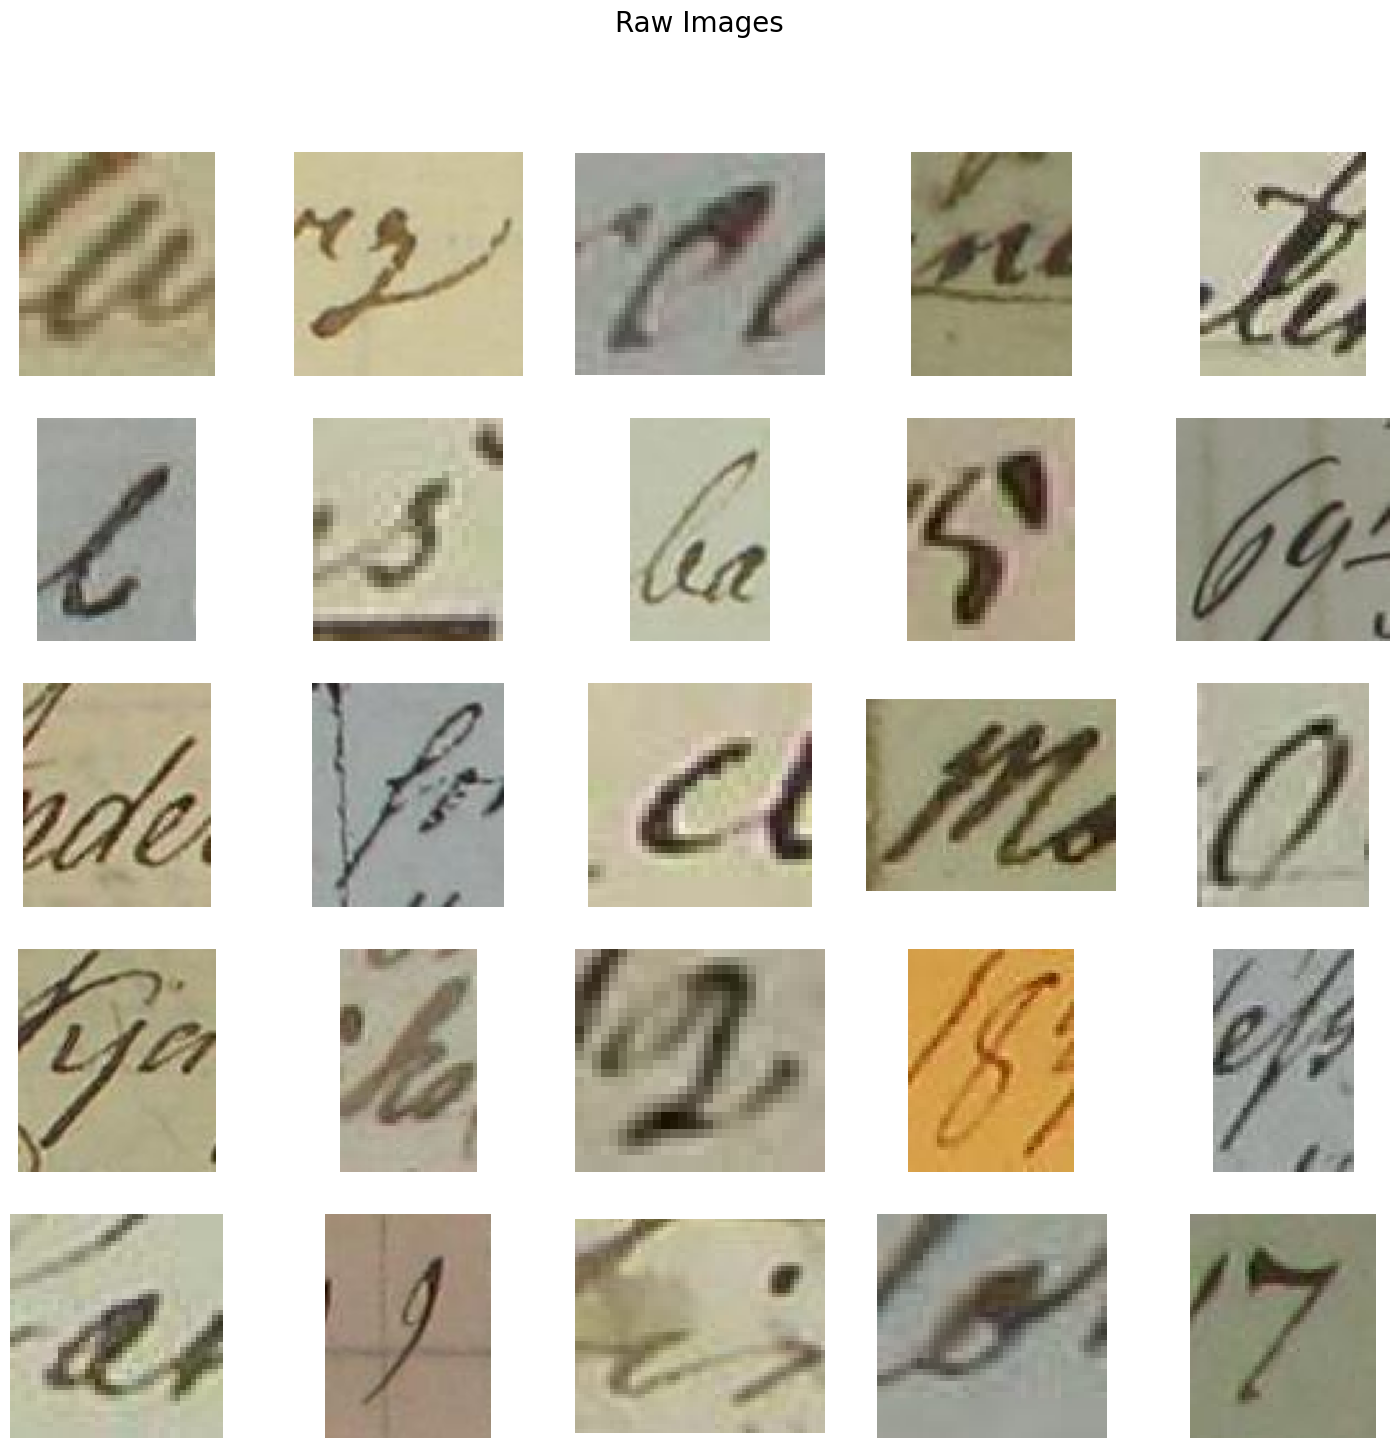

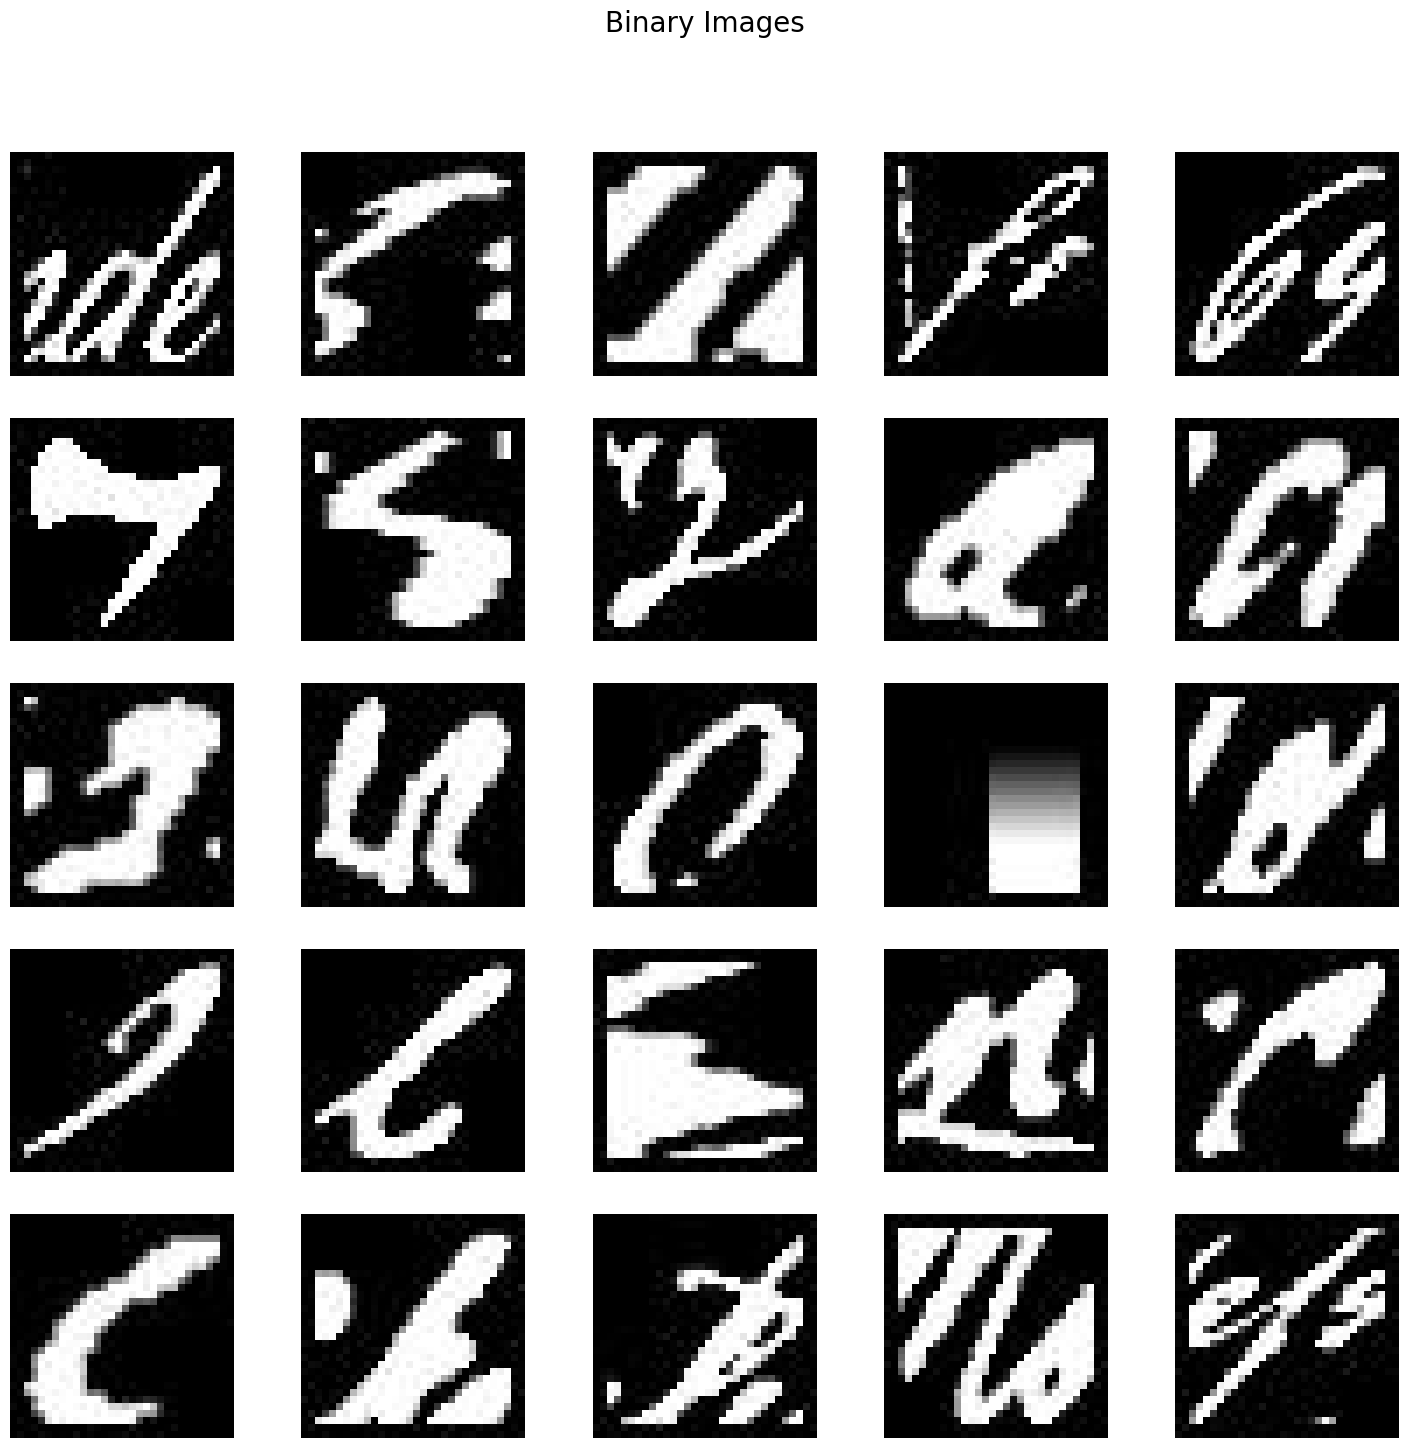

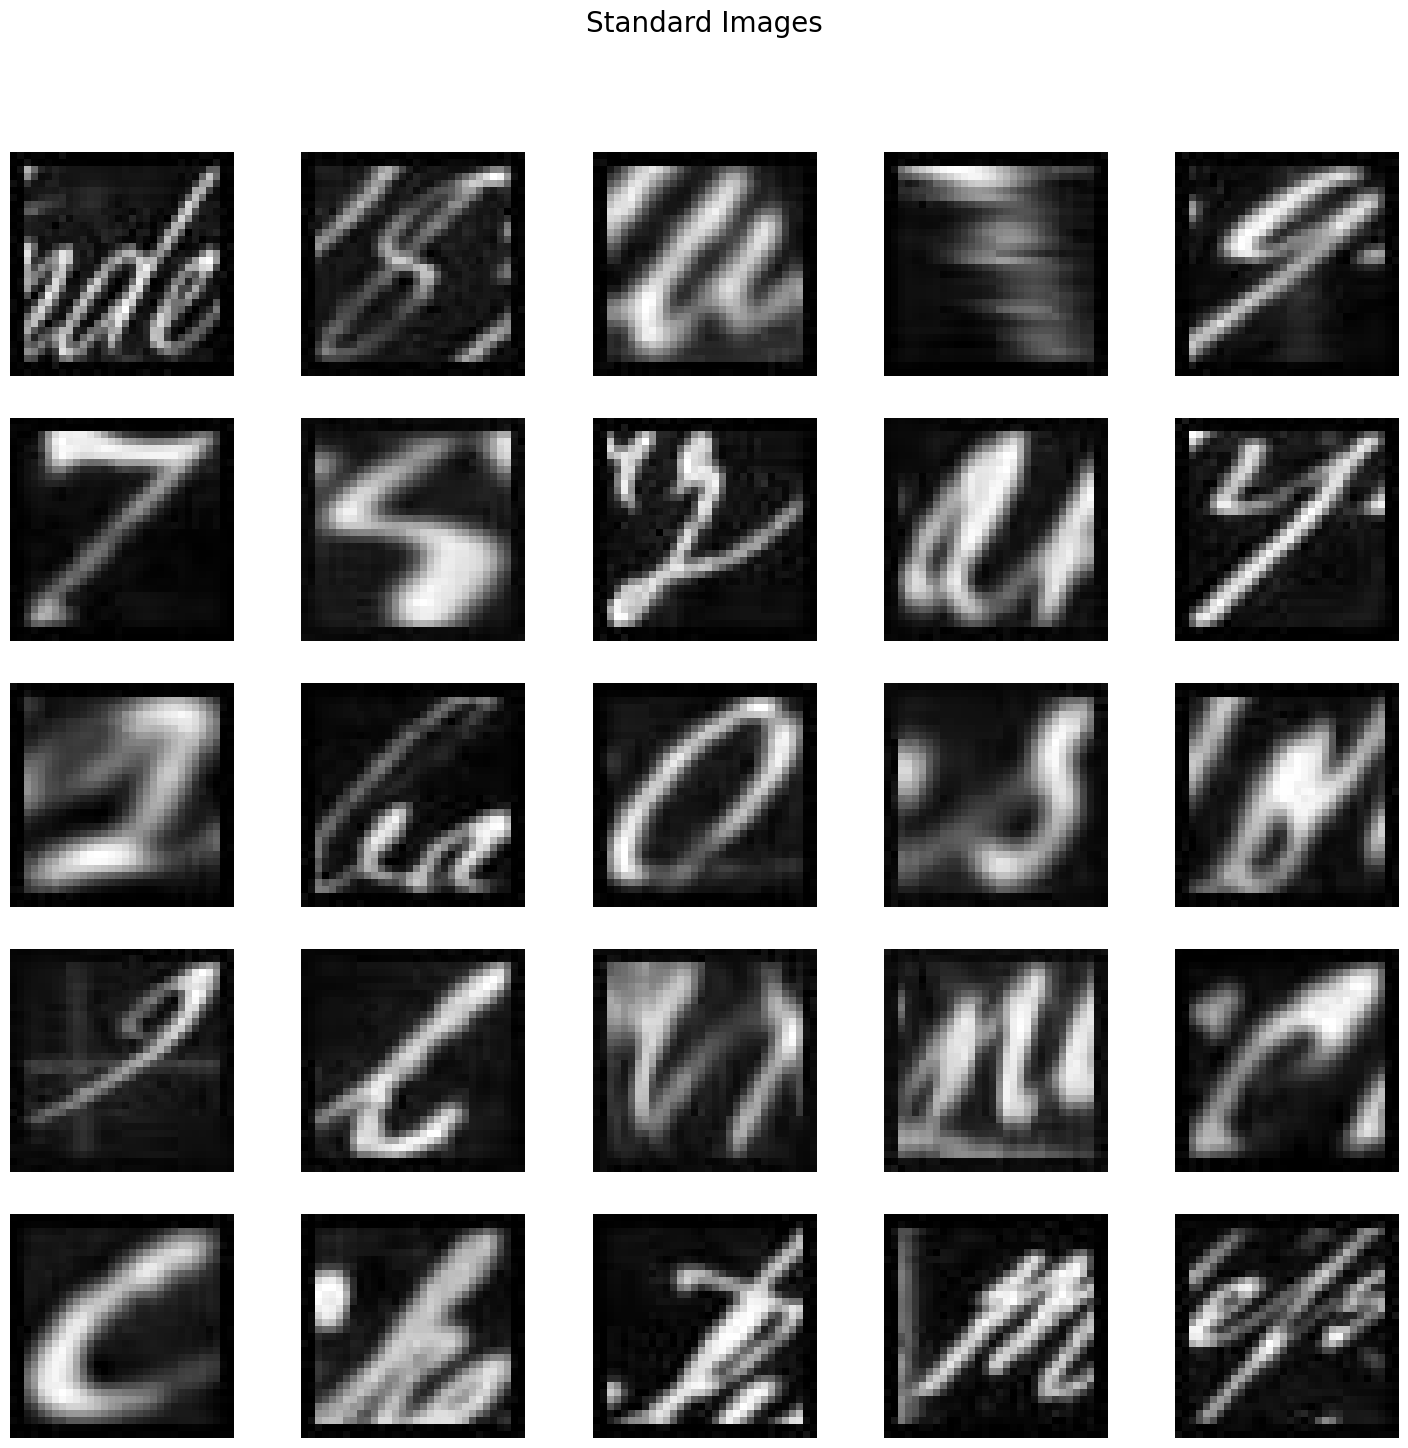

In [52]:
raw_image_paths = [os.path.join(f"{output_folder}/RAW", img) for img in os.listdir(f"{output_folder}/RAW")]
binary_image_paths = [os.path.join(f"{output_folder}/BINARIZED", img) for img in os.listdir(f"{output_folder}/BINARIZED")]
standard_image_paths = [os.path.join(f"{output_folder}/STANDARD", img) for img in os.listdir(f"{output_folder}/STANDARD")]
img_grid_path = "./imgs/qualitative_form"
# Grid size (e.g., 5x5 for 25 images)
grid_size = (5, 5)

# Create grids
make_grid(raw_image_paths, grid_size, save_path=f"{img_grid_path}/raw_grid.png", title="Raw Images")
make_grid(binary_image_paths, grid_size, save_path=f"{img_grid_path}/binary_grid.png", title="Binary Images")
make_grid(standard_image_paths, grid_size, save_path=f"{img_grid_path}/standard_grid.png", title="Standard Images")